In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
daily = pd.read_csv('../covid-daily.csv')
daily.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
3764,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3765,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3766,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3767,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3768,20200122,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN


In [43]:
daily.shape

(3769, 27)

In [44]:
daily.isnull().sum()

date                           0
state                          0
positive                      15
negative                     187
pending                     3045
hospitalizedCurrently       2249
hospitalizedCumulative      2269
inIcuCurrently              2990
inIcuCumulative             3456
onVentilatorCurrently       3142
onVentilatorCumulative      3667
recovered                   2403
dataQualityGrade            2820
lastUpdateEt                 373
hash                           0
dateChecked                    0
death                        726
hospitalized                2269
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                 56
hospitalizedIncrease          56
negativeIncrease              56
positiveIncrease              56
totalTestResultsIncrease      56
dtype: int64

In [45]:
daily = daily.dropna(subset=['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease'])


In [46]:
daily.isnull().sum()

date                           0
state                          0
positive                      14
negative                     164
pending                     3011
hospitalizedCurrently       2193
hospitalizedCumulative      2213
inIcuCurrently              2934
inIcuCumulative             3400
onVentilatorCurrently       3086
onVentilatorCumulative      3611
recovered                   2347
dataQualityGrade            2764
lastUpdateEt                 323
hash                           0
dateChecked                    0
death                        671
hospitalized                2213
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                  0
hospitalizedIncrease           0
negativeIncrease               0
positiveIncrease               0
totalTestResultsIncrease       0
dtype: int64

In [47]:
daily.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,3.713000e+03,3699.000000,3549.000000,702.000000,1520.000000,1500.000000,779.000000,313.000000,627.000000,102.000000,...,1500.000000,3.713000e+03,3.713000e+03,3.713000e+03,3713.000000,3713.000000,3713.000000,3713.000000,3713.000000,3713.000000
mean,2.020039e+07,9183.234928,46374.805861,1416.243590,1388.394737,2482.258000,611.546855,369.051118,319.942584,106.598039,...,2482.258000,5.374284e+04,5.347508e+04,5.347508e+04,32.292755,20.228117,40.994883,2168.085914,360.974414,2526.552114
std,6.972279e+01,29476.630652,90972.178797,7240.557601,2670.929690,8999.758521,954.991384,352.876055,428.955917,67.344285,...,8999.758521,1.130587e+05,1.129733e+05,1.129733e+05,18.546182,67.173624,249.707475,5192.979773,935.433820,5681.638602
min,2.020012e+07,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,6.000000,0.000000,2.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-201.000000,-181.000000,-5174.000000,-383.000000,-9269.000000
25%,2.020032e+07,88.000000,1378.000000,10.000000,86.000000,101.750000,91.500000,86.000000,28.500000,57.000000,...,101.750000,9.950000e+02,9.140000e+02,9.140000e+02,17.000000,0.000000,0.000000,25.000000,7.000000,62.000000
50%,2.020041e+07,1101.000000,14957.000000,52.000000,371.000000,427.500000,166.000000,260.000000,137.000000,95.000000,...,427.500000,1.482400e+04,1.479400e+04,1.479400e+04,32.000000,2.000000,0.000000,598.000000,72.000000,698.000000
75%,2.020042e+07,6080.000000,51075.000000,370.750000,1514.250000,1265.250000,876.500000,514.000000,497.000000,136.250000,...,1265.250000,5.659700e+04,5.576400e+04,5.576400e+04,46.000000,11.000000,7.000000,2351.000000,310.000000,2730.000000
max,2.020051e+07,337055.000000,923958.000000,64400.000000,18825.000000,73143.000000,5225.000000,1414.000000,2425.000000,276.000000,...,73143.000000,1.204651e+06,1.204651e+06,1.204651e+06,78.000000,951.000000,7758.000000,163092.000000,11571.000000,165227.000000


In [48]:
daily.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [49]:
daily.corr()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,1.000000,0.258101,0.442977,0.011677,-0.006755,0.133903,-0.107017,0.442391,0.008566,0.387069,...,0.133903,0.416399,0.417407,0.417407,-0.003994,0.175620,0.074877,0.277710,0.160620,0.279550
positive,0.258101,1.000000,0.738830,0.054658,0.838429,0.993223,0.865444,0.923541,0.787394,0.866808,...,0.993223,0.845846,0.846390,0.846390,-0.042312,0.781434,0.453801,0.517886,0.719575,0.591956
negative,0.442977,0.738830,1.000000,0.083019,0.593224,0.822194,0.555818,0.859684,0.588003,0.620343,...,0.822194,0.984049,0.984380,0.984380,-0.081292,0.497083,0.263306,0.707713,0.501407,0.730256
pending,0.011677,0.054658,0.083019,1.000000,0.133868,0.642748,0.141527,-0.394307,0.286631,NaN,...,0.642748,0.165888,0.083064,0.083064,-0.225767,0.093609,-0.017775,0.122590,0.313405,0.143489
hospitalizedCurrently,-0.006755,0.838429,0.593224,0.133868,1.000000,0.843392,0.987155,0.860492,0.959535,0.345277,...,0.843392,0.697262,0.696359,0.696359,-0.050930,0.908104,0.561603,0.444011,0.913722,0.564545
hospitalizedCumulative,0.133903,0.993223,0.822194,0.642748,0.843392,1.000000,0.893668,0.966958,0.974091,0.962132,...,1.000000,0.901360,0.901664,0.901664,0.027436,0.786340,0.502712,0.720870,0.694317,0.770379
inIcuCurrently,-0.107017,0.865444,0.555818,0.141527,0.987155,0.893668,1.000000,0.907040,0.985494,0.966003,...,0.893668,0.685159,0.683491,0.683491,-0.165050,0.911938,0.625614,0.400982,0.904450,0.525735
inIcuCumulative,0.442391,0.923541,0.859684,-0.394307,0.860492,0.966958,0.907040,1.000000,0.887402,0.973261,...,0.966958,0.878472,0.878587,0.878587,0.069509,0.668945,0.187614,0.563673,0.723233,0.599211
onVentilatorCurrently,0.008566,0.787394,0.588003,0.286631,0.959535,0.974091,0.985494,0.887402,1.000000,-0.555530,...,0.974091,0.667056,0.666994,0.666994,-0.010087,0.768147,0.050369,0.391114,0.867234,0.485323
onVentilatorCumulative,0.387069,0.866808,0.620343,NaN,0.345277,0.962132,0.966003,0.973261,-0.555530,1.000000,...,0.962132,0.645398,0.645398,0.645398,-0.273895,0.659243,0.067876,0.355419,0.536587,0.375550


In [50]:
daily.dtypes

date                          int64
state                        object
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
recovered                   float64
dataQualityGrade             object
lastUpdateEt                 object
hash                         object
dateChecked                  object
death                       float64
hospitalized                float64
total                         int64
totalTestResults              int64
posNeg                        int64
fips                          int64
deathIncrease               float64
hospitalizedIncrease        float64
negativeIncrease            float64
positiveIncrease            float64
totalTestResultsIncrease    float64
dtype: object

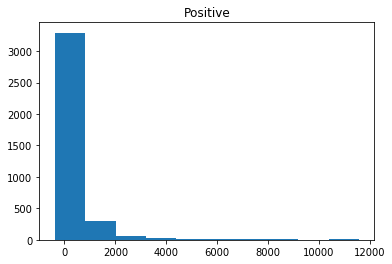

In [55]:
plt.hist(daily['positiveIncrease'])
plt.title('Positive');

/Users/EderlynT/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


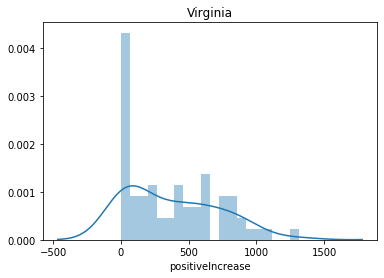

In [67]:
plt.title('Virginia')
sns.distplot(daily[daily['state'] == 'VA']['positiveIncrease'],
             bins = 20,
             kde = True)

/Users/EderlynT/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


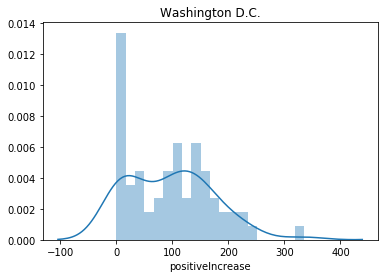

In [69]:
plt.title('Washington D.C.')
sns.distplot(daily[daily['state'] == 'DC']['positiveIncrease'],
             bins = 20,
             kde = True)

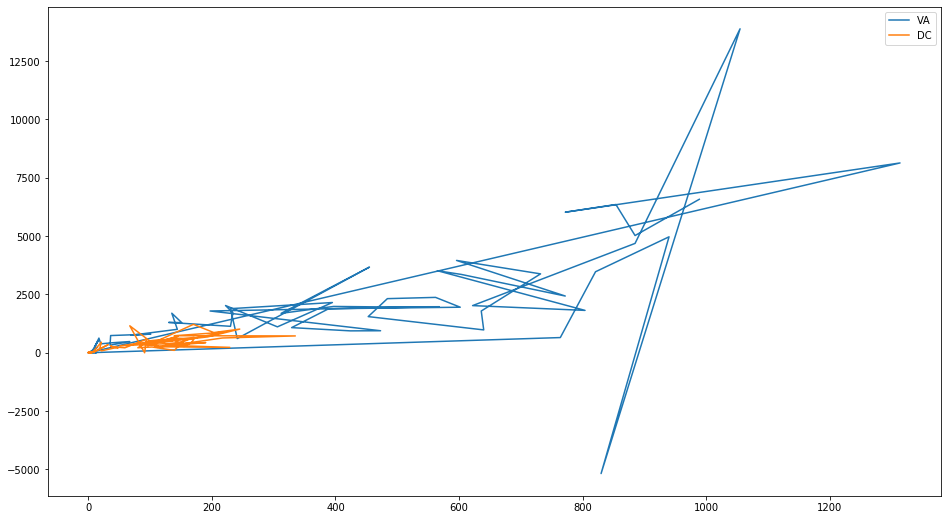

In [60]:
#
plt.figure(figsize=(16, 9))

# Create line plot of GOOG volume over time.
plt.plot(daily[daily['state'] == 'VA']['positiveIncrease'],
         daily[daily['state'] == 'VA']['negativeIncrease'],
         label = 'VA')

# Create line plot of NKE volume over time.
plt.plot(daily[daily['state'] == 'DC']['positiveIncrease'],
         daily[daily['state'] == 'DC']['negativeIncrease'],
         label = 'DC')

plt.legend(loc = 'upper right');

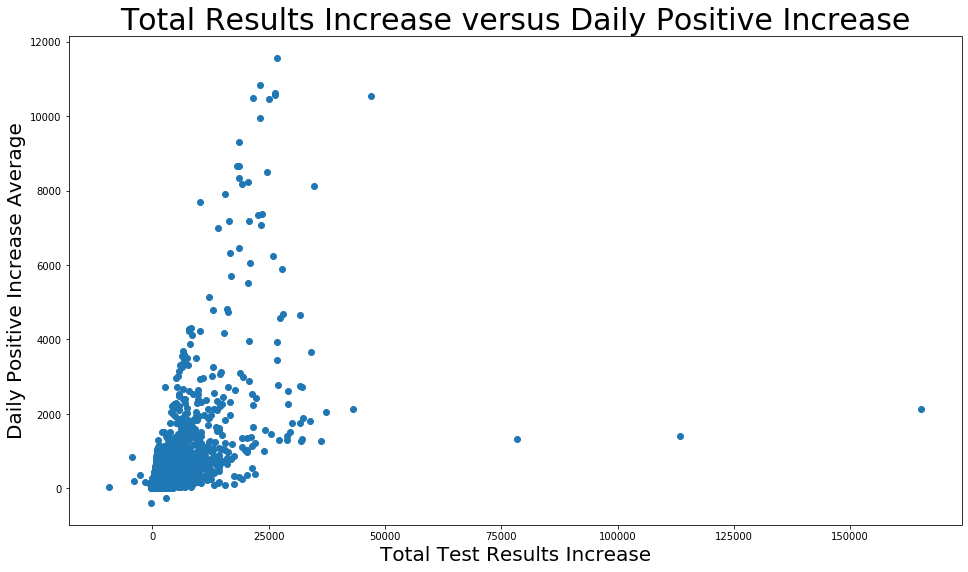

In [65]:
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(daily['totalTestResultsIncrease'],
            daily['positiveIncrease']);

plt.title("Total Results Increase versus Daily Positive Increase", fontsize = 30)
plt.ylabel("Daily Positive Increase Average", fontsize = 20)
plt.xlabel("Total Test Results Increase", fontsize = 20);

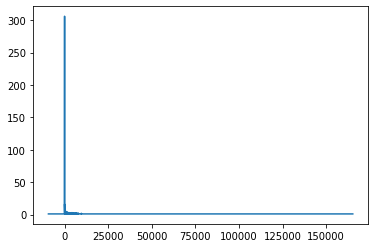

In [73]:
daily['totalTestResultsIncrease'].value_counts().sort_index().plot(kind = 'line')